# Explore here

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [1]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

Exploracion

In [3]:
total_data.shape


(41188, 21)

The DataFrame contains 41188 records (rows) and 21 variables (columns).

In [4]:

# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:

duplicados=total_data.duplicated().sum()
duplicados

12

In [7]:
total_data_sinduplicados = total_data.drop_duplicates()
total_data_sinduplicados 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
duplicados=total_data_sinduplicados .duplicated().sum()
duplicados

0

In [9]:
total_data_sinduplicados.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

Let’s see the size of it and let’s analyze a bit the main metrics regarding its “y” label:

In [10]:
total_data_sinduplicados.drop(['month', 'day_of_week', "contact", "nr.employed", "pdays"], axis = 1, inplace = True)
total_data_sinduplicados.head()

/tmp/ipykernel_42880/4063639616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.drop(['month', 'day_of_week', "contact", "nr.employed", "pdays"], axis = 1, inplace = True)


,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no


In [13]:
import pandas as pd
total_data_sinduplicados.loc[:, 'job_n'] = pd.factorize(total_data_sinduplicados['job'])[0]
total_data_sinduplicados.loc[:, 'marital_n'] = pd.factorize(total_data_sinduplicados['marital'])[0]
total_data_sinduplicados.loc[:, 'education_n'] = pd.factorize(total_data_sinduplicados['education'])[0]
total_data_sinduplicados.loc[:, 'default_n'] = pd.factorize(total_data_sinduplicados['default'])[0]
total_data_sinduplicados.loc[:, 'housing_n'] = pd.factorize(total_data_sinduplicados['housing'])[0]
total_data_sinduplicados.loc[:, 'loan_n'] = pd.factorize(total_data_sinduplicados['loan'])[0]

total_data_sinduplicados.loc[:, 'poutcome_n'] = pd.factorize(total_data_sinduplicados['poutcome'])[0]

total_data_sinduplicados.loc[:, 'y_n'] = pd.factorize(total_data_sinduplicados['y'])[0]
total_data_sinduplicados.head(5)


/tmp/ipykernel_42880/1708153209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.loc[:, 'y_n'] = pd.factorize(total_data_sinduplicados['y'])[0]


,age,job,marital,education,default,housing,loan,duration,campaign,previous,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,0,...,4.857,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,0,...,4.857,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,...,4.857,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,0,...,4.857,no,1,0,1,0,0,1,0,0


#### Paso 4. Análisis multivariante

correlacion


In [ ]:
total_data_sinduplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

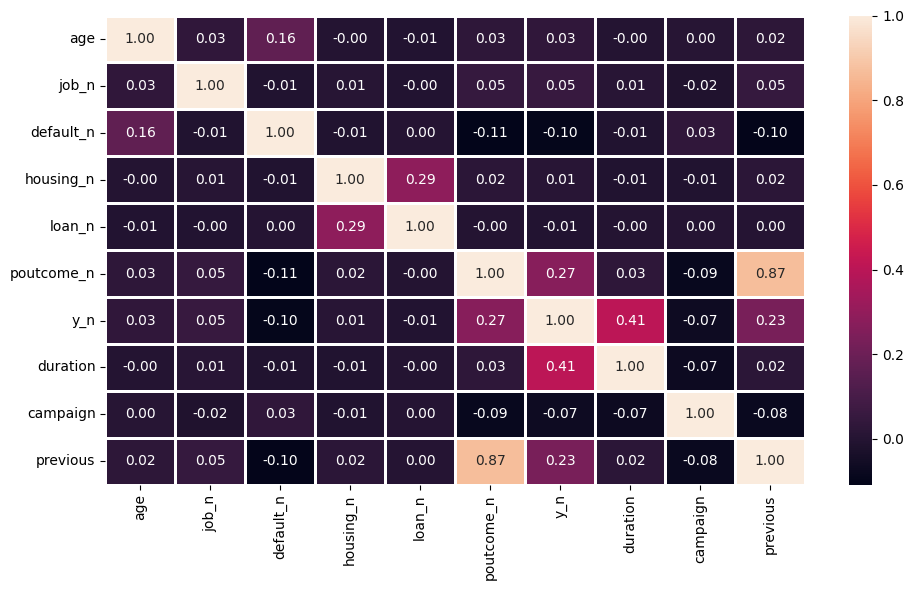

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_sinduplicados[['age','job_n', 'default_n', 'housing_n', 'loan_n', 'poutcome_n', 'y_n','duration', 'campaign', 'previous']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)
#sns.heatmap(total_data_sinduplicados.corr(),annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

total_data
total_data_no_outliers

In [ ]:
from sklearn.model_selection import train_test_split

predictoras = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_n',
       'Embarked_n']
target = 'Survived'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train

X_train, X_test, y_train, y_test
X_train_no_outliers, X_test_no_outliers, y_train, y_test

# GUARDAR LOS DOS DATASETS

In [ ]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

dump(scaler, open("/workspaces/ml_template/normalizer.sav", "wb"))

X_train_norm.head(

In [ ]:
df.to_csv()
nombre_df.to_excel()

In [ ]:
# X_train_norm, X_test_norm, y_train, y_test
# X_train_no_outliers_norm, X_test_no_outliers_norm, y_train, y_test

# GUARDAR LOS DOS DATASETS
# GUARDAR EL MODELO DE NORMALIZACIÓN (objeto scaler)

from pickle import load

scaler = load(open("/workspaces/ml_template/normalizer.sav", "rb"))

In [ ]:
# .......... Lo mismo con el Min-Max Scaler

X_train_scal, X_test_scal, y_train, y_test
X_train_no_outliers_scal, X_test_no_outliers_scal, y_train, y_test

# GUARDAR LOS DOS DATASETS
# GUARDAR EL MODELO DE ESCALADO MIN-MAX (objeto scaler)

### Day 03

##### Feature Selection

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

selector_model = SelectKBest(f_classif, k = 5)
selector_model.fit(X_train, y_train)
best_variables = selector_model.get_support()
print("Mejores variables: ", best_variables)
X_train_sel = pd.DataFrame(selector_model.transform(X_train))

In [ ]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv")

train_data.head()

In [ ]:
X_train = train_data.drop(["Survived"], axis = 1)
y_train = train_data["Survived"]
X_test = test_data.drop(["Survived"], axis = 1)
y_test = test_data["Survived"]

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
print(y_train_pred)

In [ ]:
hyperp_dict = {
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "max_iter": [5, 15, 50, 100]
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperp_dict, scoring = "accuracy", cv = 10)
grid

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
accuracy_score(y_train, LogisticRegression(max_iter = 50).fit(X_train, y_train).predict(X_train))

In [ ]:
y_train_pred = grid.best_estimator_.predict(X_train)
accuracy_score(y_train, y_train_pred)

In [ ]:
from pickle import dump

dump(grid.best_estimator_, open("/workspaces/ml_template/log_regression-max_iter-50.sav", "wb")

In [ ]:
grid.best_estimator_git 
